## Introducción

Entrenamiento de modelo preentrenado para resolver el problema de predecir el ángulo del auto en base a la imagen.

Fuertemente basado en:
- https://towardsdatascience.com/a-practical-example-in-transfer-learning-with-pytorch-846bb835f2db
- https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html 

## Imports

In [5]:
import torch
import dataset_modules.image_preloader as image_preloader
import main
import importlib
import dataset_modules.preloaded_one_part_dataset as popd

importlib.reload(main)
importlib.reload(popd)

import torchvision.transforms as transforms

## Variables

In [2]:
FEATURE_EXTRACTION = False

device_string = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device_string)

if device_string == "cuda":
    print("Usando GPU!")

Usando GPU!


In [3]:
# preload images
preloaded_images = image_preloader.preload_images(
        images_folder='./dataset_modules/imgs/', 
        state_file='./dataset_modules/state.json', 
        resize_to=224
)

Started to preload images...
Image preloading complete in 2m 1s
The preloaded images use 0.07039642333984375MB of memory


----- CLASS DISTRIBUTION -----
Class: guardabarro_delantero_izquierdo_sano, #233, 58.25%
Class: guardabarro_delantero_izquierdo_roto, #167, 41.75%
#TRAIN 320 #TEST 80
Epoch 0/39
----------
train Loss: 0.6849 Main metric (macro_f1): 0.4492 Time: 2.34s
test Loss: 0.7081 Main metric (macro_f1): 0.3667 Time: 0.27s
Epoch 1/39
----------
train Loss: 0.6592 Main metric (macro_f1): 0.4057 Time: 2.33s
test Loss: 0.6928 Main metric (macro_f1): 0.3969 Time: 0.27s
ES Module Best: 0.6927923560142517, BadEpochs: 0
Epoch 2/39
----------
train Loss: 0.6475 Main metric (macro_f1): 0.4876 Time: 2.34s
test Loss: 0.7118 Main metric (macro_f1): 0.3667 Time: 0.27s
ES Module Best: 0.6927923560142517, BadEpochs: 1
Epoch 3/39
----------
train Loss: 0.6377 Main metric (macro_f1): 0.5063 Time: 2.35s
test Loss: 0.6935 Main metric (macro_f1): 0.4589 Time: 0.27s
ES Module Best: 0.6927923560142517, BadEpochs: 2
Epoch 4/39
----------
train Loss: 0.6175 Main metric (macro_f1): 0.5896 Time: 2.34s
test Loss: 0.7277 Main

,class,precision,recall,f1
0,guardabarro_delantero_izquierdo_roto,0.652174,0.384615,0.483871
1,guardabarro_delantero_izquierdo_sano,0.578947,0.804878,0.673469


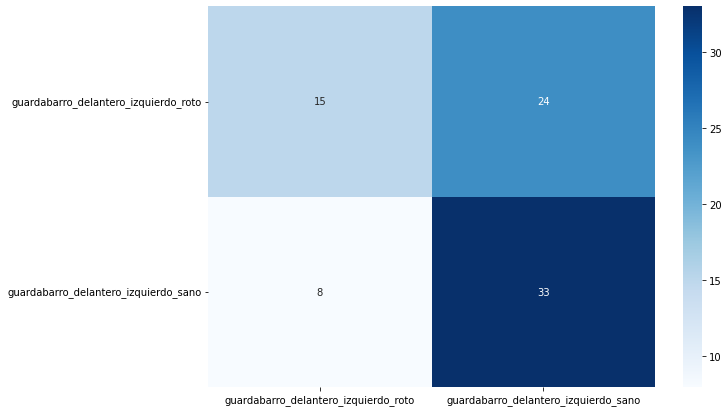

In [7]:
part = "Guardabarro Delantero Izquierdo"
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "resnet50_finetuning-Guardabarro-Delantero-Izquierdo"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    train_ratio=0.8,
    random_state=42,
    num_epochs=40,
    remove_not_visible=True,
    ignore_repair=False,
    i_patience=10
)

In [ ]:
import random
import numpy as np

random_state=42

torch.manual_seed(random_state)
random.seed(random_state)
np.random.seed(random_state)

data_augmentation=transforms.Compose([
        transforms.ColorJitter(0.3, 0.3, 0.3, 0.3),
        #transforms.RandomRotation((-45, 45))
        #transforms.ColorJitter(0.5, 0.5, 0.5, 0.5),
        #transforms.RandomApply([transforms.RandomRotation((-20, 20))], p=0.2),
        #transforms.RandomEqualize(),
        transforms.RandomHorizontalFlip(p=0.5),
    ])

"""dataset = popd.PreloadedOnePartDataset(
    part,
    preloaded_images,
    data_augmentation=data_augmentation,
    class_to_augment=0,
    remove_not_visible=True,
    ignore_repair=True
)

for i in range(10):
    display(dataset[11][0])
"""

In [ ]:
part = "Capot"
MODEL_NAME = "one_part_model-capot"
EXPERIMENT_NAME = "resnet50_capot_augment"

main.train_one_part_model_dataugment(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    train_ratio=0.8,
    random_state=42,
    num_epochs=40,
    ignore_repair=True,
    remove_not_visible=True,
    data_augmentation=data_augmentation,
    class_to_augment=0
)